# Computational Finance
## Series 11
Tientso Ning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#define the bond properties


In [3]:
#Interest Curve
principal1 = [100,100,100,100,100]
principal2 = [100,100,100,100,100,100]
maturity1 = [1,2,3,6,12]
maturity2 = [2,3,4,5,7,10]
coupon1 = [0,0,0,3,4]
coupon2 = [4,4,4,4,0,0]
price1 = [99.80,99.60,99.40,100.27,101.57]
price2 = [103.21,104.85,106.36,107.77,84.48,77.72]
curve1 = pd.DataFrame(data={"principal":principal1, "maturity":maturity1,"coupon":coupon1, "price":price1})
curve2 = pd.DataFrame(data={"principal":principal2, "maturity":maturity2,"coupon":coupon2, "price":price2})
curve1['coupon'] = curve1['coupon']*2
curve1['maturity'] = curve1['maturity']/12
curve1['zero.rate'] = curve1['coupon']

In [4]:
print(curve1)
print(curve2)

   principal  maturity  coupon   price
0        100  0.083333       0   99.80
1        100  0.166667       0   99.60
2        100  0.250000       0   99.40
3        100  0.500000       6  100.27
4        100  1.000000       8  101.57
   principal  maturity  coupon   price
0        100         2       4  103.21
1        100         3       4  104.85
2        100         4       4  106.36
3        100         5       4  107.77
4        100         7       0   84.48
5        100        10       0   77.72


In [17]:
2*5.1/94.9

0.10748155953635405

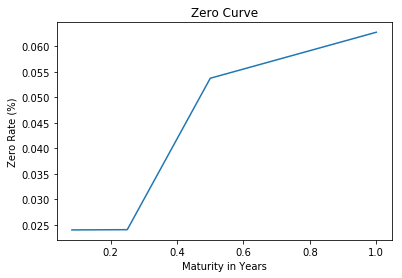

In [21]:
""" Bootstrapping the yield curve """
import math
    
class BootstrapYieldCurve(object):
    
    def __init__(self):
        self.zero_rates = dict()  # Map each T to a zero rate
        self.instruments = dict()  # Map each T to an instrument
        
    def add_instrument(self, par, T, coup, price,
                       compounding_freq=2):
        """  Save instrument info by maturity """
        self.instruments[T] = (par, coup, price, compounding_freq)
    
    def get_zero_rates(self):
        """  Calculate a list of available zero rates """
        self.__bootstrap_zero_coupons__()
        self.__get_bond_spot_rates__()
        return [self.zero_rates[T] for T in self.get_maturities()]
        
    def get_maturities(self):
        """ Return sorted maturities from added instruments. """
        return sorted(self.instruments.keys())
        
    def __bootstrap_zero_coupons__(self):
        """ Get zero rates from zero coupon bonds """
        for T in self.instruments.keys():
            (par, coup, price, freq) = self.instruments[T]
            if coup == 0:
                self.zero_rates[T] = \
                    self.zero_coupon_spot_rate(par, price, T)
                    
    def __get_bond_spot_rates__(self):
        """ Get spot rates for every marurity available """
        for T in self.get_maturities():
            instrument = self.instruments[T]
            (par, coup, price, freq) = instrument

            if coup != 0:
                self.zero_rates[T] = \
                    self.__calculate_bond_spot_rate__(
                        T, instrument)
                
    def __calculate_bond_spot_rate__(self, T, instrument):
        """ Get spot rate of a bond by bootstrapping """
        try:
            (par, coup, price, freq) = instrument
            periods = T * freq  # Number of coupon payments
            value = price
            per_coupon = coup / freq  # Coupon per period

            for i in range(int(periods)-1):
                t = (i+1)/float(freq)
                spot_rate = self.zero_rates[t]
                discounted_coupon = per_coupon * \
                                    math.exp(-spot_rate*t)
                value -= discounted_coupon

            # Derive spot rate for a particular maturity
            last_period = int(periods)/float(freq)        
            spot_rate = -math.log(value /
                                  (par+per_coupon))/last_period
            return spot_rate

        except:
            print("Error: spot rate not found for T=%s" % t)
            
    def zero_coupon_spot_rate(self, par, price, T):
        """ Get zero rate of a zero coupon bond """
        spot_rate = math.log(par/price)/T
        return spot_rate


if __name__ == "__main__":
    yield_curve = BootstrapYieldCurve()
    yield_curve.add_instrument(100, 1/12, 0., 99.80)
    yield_curve.add_instrument(100, 2/12, 0., 99.60)
    yield_curve.add_instrument(100, 3/12, 0., 99.4)
    yield_curve.add_instrument(100, 6/12, 6, 100.27)
    yield_curve.add_instrument(100, 12/12, 8, 101.57)
    y = yield_curve.get_zero_rates()
    x = yield_curve.get_maturities()

    import matplotlib.pyplot as plt
    plt.plot(x, y)
    plt.title("Zero Curve")
    plt.ylabel("Zero Rate (%)")
    plt.xlabel("Maturity in Years")
    plt.show()